In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier # KNeighborsRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import pickle

Carga do dataset Premier League

In [47]:
df_dataset = pd.read_parquet('dataset_9.parquet')
df_dataset

,Ano,Rodada,id,fgk_equipe,Oponente,TR0,TR1,TR2,TR3,TR4,...,OP4,OC0,OC1,OC2,OC3,OC4,OGL,Resultado,GP,GC
0,2014-2015,6,9d2c4411,17892952,b2b47a98,1,0,2,1,0,...,0,2,4,3,0,2,1,2,1,0
1,2014-2015,7,bc4351a4,17892952,8ef52968,2,1,0,2,1,...,1,0,0,2,1,1,0,0,1,3
2,2014-2015,8,6fa0779f,17892952,fb10988f,0,2,1,0,2,...,3,2,0,1,4,0,1,2,2,1
3,2014-2015,9,2be4379e,17892952,33c895d4,2,0,2,1,0,...,4,0,1,1,0,0,0,0,0,1
4,2014-2015,10,c172f461,17892952,7c21e445,0,2,0,2,1,...,3,1,1,0,2,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5445,2022-2023,12,e6102606,fd962109,8602292d,1,0,0,2,0,...,1,2,1,0,0,1,1,2,3,0
5446,2022-2023,13,d7b30e2b,fd962109,5bfb9659,2,1,0,0,2,...,2,2,1,2,0,5,0,2,3,2
5447,2022-2023,14,9c4402e1,fd962109,d3fd31cc,2,2,1,0,0,...,2,0,1,2,2,1,1,1,0,0
5448,2022-2023,15,6ef27b3c,fd962109,b8fd03ef,1,2,2,1,0,...,6,0,1,1,0,3,0,0,1,2


ids = Campos de classificação <br>
fields Campos de paramentros e resultados

In [46]:
ids = list(df_dataset)[:5]
fields = list(df_dataset)[5:]
print('ids', ids)
print('fields', fields)

ids ['Ano', 'Rodada', 'id', 'fgk_equipe', 'Oponente']
fields ['TR0', 'TR1', 'TR2', 'TR3', 'TR4', 'TL0', 'TL1', 'TL2', 'TL3', 'TL4', 'TP0', 'TP1', 'TP2', 'TP3', 'TP4', 'TC0', 'TC1', 'TC2', 'TC3', 'TC4', 'TGL', 'OR0', 'OR1', 'OR2', 'OR3', 'OR4', 'OL0', 'OL1', 'OL2', 'OL3', 'OL4', 'OP0', 'OP1', 'OP2', 'OP3', 'OP4', 'OC0', 'OC1', 'OC2', 'OC3', 'OC4', 'OGL', 'Resultado', 'GP', 'GC']


Função para obter apenas campos de input

In [8]:
def get_fields(field, remove):
    for i in remove:
        field.remove(i)
    return field

In [53]:
# listdf_dataset

for v in ['TP'+str(i) for i in range(5)] + ['TC'+str(i) for i in range(5)] + ['OP'+str(i) for i in range(5)] + ['OC'+str(i) for i in range(5)]+ ['GP', 'GC']:
    df_dataset = df_dataset.assign(
        **{v: lambda x: x[v].apply(
            lambda y:1 if y>0 else 0
        )}
    )
df_dataset

,Ano,Rodada,id,fgk_equipe,Oponente,TR0,TR1,TR2,TR3,TR4,...,OP4,OC0,OC1,OC2,OC3,OC4,OGL,Resultado,GP,GC
0,2014-2015,6,9d2c4411,17892952,b2b47a98,1,0,2,1,0,...,0,1,1,1,0,1,1,2,1,0
1,2014-2015,7,bc4351a4,17892952,8ef52968,2,1,0,2,1,...,1,0,0,1,1,1,0,0,1,1
2,2014-2015,8,6fa0779f,17892952,fb10988f,0,2,1,0,2,...,1,1,0,1,1,0,1,2,1,1
3,2014-2015,9,2be4379e,17892952,33c895d4,2,0,2,1,0,...,1,0,1,1,0,0,0,0,0,1
4,2014-2015,10,c172f461,17892952,7c21e445,0,2,0,2,1,...,1,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5445,2022-2023,12,e6102606,fd962109,8602292d,1,0,0,2,0,...,1,1,1,0,0,1,1,2,1,0
5446,2022-2023,13,d7b30e2b,fd962109,5bfb9659,2,1,0,0,2,...,1,1,1,1,0,1,0,2,1,1
5447,2022-2023,14,9c4402e1,fd962109,d3fd31cc,2,2,1,0,0,...,1,0,1,1,1,1,1,1,0,0
5448,2022-2023,15,6ef27b3c,fd962109,b8fd03ef,1,2,2,1,0,...,1,0,1,1,0,1,0,0,1,1


In [29]:
# tp = ['TP'+str(i) for i in range(5)]
# tc = ['TC'+str(i) for i in range(5)]

# op = ['OP'+str(i) for i in range(5)]
# oc = ['OC'+str(i) for i in range(5)]

# for k, v in enumerate(tp):
#     df_dataset = df_dataset.assign(
#         **{
#             tp[k]: lambda x: x[tp[k]] - x[tc[k]]
#             , tc[k]: 0
#             , op[k]: lambda x: x[op[k]] - x[oc[k]]
#             , oc[k]: 0
#             , 'GP': lambda x: x['GP']-x['GC']
#             , 'GC': 0
#         }
#     )
    
# df_dataset

,Ano,Rodada,id,fgk_equipe,Oponente,TR0,TR1,TR2,TR3,TR4,...,OP4,OC0,OC1,OC2,OC3,OC4,OGL,Resultado,GP,GC
0,2014-2015,6,9d2c4411,17892952,b2b47a98,1,0,2,1,0,...,-2,0,0,0,0,0,1,2,1,0
1,2014-2015,7,bc4351a4,17892952,8ef52968,2,1,0,2,1,...,0,0,0,0,0,0,0,0,-2,0
2,2014-2015,8,6fa0779f,17892952,fb10988f,0,2,1,0,2,...,3,0,0,0,0,0,1,2,1,0
3,2014-2015,9,2be4379e,17892952,33c895d4,2,0,2,1,0,...,4,0,0,0,0,0,0,0,-1,0
4,2014-2015,10,c172f461,17892952,7c21e445,0,2,0,2,1,...,2,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5445,2022-2023,12,e6102606,fd962109,8602292d,1,0,0,2,0,...,0,0,0,0,0,0,1,2,3,0
5446,2022-2023,13,d7b30e2b,fd962109,5bfb9659,2,1,0,0,2,...,-3,0,0,0,0,0,0,2,1,0
5447,2022-2023,14,9c4402e1,fd962109,d3fd31cc,2,2,1,0,0,...,1,0,0,0,0,0,1,1,0,0
5448,2022-2023,15,6ef27b3c,fd962109,b8fd03ef,1,2,2,1,0,...,3,0,0,0,0,0,0,0,-1,0


Serapação de input e resultados somente dos nos ateriores a 2022-2023<br>
input - X <br>
Resultados - y_gp e y_gc

In [54]:
X = df_dataset.query("Ano != '2022-2023'")[ids+get_fields(fields.copy(), ['Resultado', 'GP', 'GC'])].to_numpy()
y_gp = df_dataset.query("Ano != '2022-2023'")['GP'].to_numpy()
y_gc = df_dataset.query("Ano != '2022-2023'")['GC'].to_numpy()

X_2022_o = df_dataset.query("Ano == '2022-2023'")[get_fields(fields.copy(), ['Resultado', 'GP', 'GC'])].to_numpy()
y_2022_gp = df_dataset.query("Ano == '2022-2023'")['GP'].to_numpy()
y_2022_gc = df_dataset.query("Ano == '2022-2023'")['GC'].to_numpy()

### Modelo GP

Separação de Treino e Teste

In [55]:
X_train_id, X_test_id, y_train, y_test = train_test_split(X, y_gp, test_size = 0.30, random_state=1981)

X_train = X_train_id[:, 5:]
X_test = X_test_id[:, 5:]

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_2022 = scaler.transform(X_2022_o)

scalerfile = 'KNRegressor_gp_scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

# scalerfile = 'scaler.sav'
# scaler = pickle.load(open(scalerfile, 'rb'))
# test_scaled_set = scaler.transform(test_set)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3696, 42)
(1584, 42)
(3696,)
(1584,)


Execução do Modelo

Text(0, 0.5, 'Accuracy')

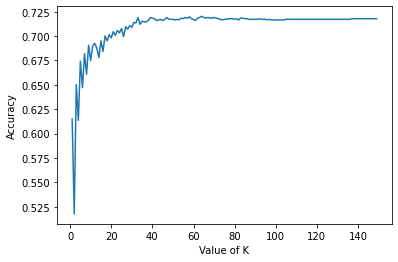

In [58]:
# We are going to run it for k = 1 to 15 and will be recording testing accuracy, plotting it, showing confusion matrix and classification report:
range_k = range(1,150)
scores = {}
scores_list = []
for k in range_k:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
#     scores[k] = metrics.r2_score(y_test,y_pred)
#     scores_list.append(metrics.r2_score(y_test,y_pred))
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    result = metrics.confusion_matrix(y_test, y_pred)

# plt.plot(list(scores.keys()),list(scores.values()))
# plt.xlabel("Value of K")
# plt.ylabel("r2_score")

plt.plot(list(scores.keys()),list(scores.values()))
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

Melhor valor de k (vizinhos)

In [59]:
k  = pd.DataFrame({
    'k': scores.keys()
    , 'Accuracy': scores.values()
}).query(
    "Accuracy == Accuracy.max()", engine='python'
)['k'].values[0]

pd.DataFrame({
    'k': scores.keys()
    , 'Accuracy': scores.values()
}).query(
    "Accuracy == Accuracy.max()", engine='python'
)

,k,Accuracy
63,64,0.720328


In [61]:
model = KNeighborsClassifier(n_neighbors=64)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

[[   9  438]
 [   5 1132]]


Previsão com os jogos de 2022-2023

In [14]:
# Train again

model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train)

y_pred = model.predict(X_2022)
print(metrics.r2_score(y_2022_gp,y_pred))

# y_pred = model.predict(X_test)
# print(metrics.r2_score(y_test,y_pred))

0.07786818579458044


Analise do resultado

In [15]:
pd.DataFrame(
    {'y_teste':y_2022_gp*10, 'y_pred':y_pred*10}
).assign(
    **{'diff': lambda x: x['y_teste'] - x['y_pred']}
).assign(
    **{'diff_abs_round': lambda x: x['diff'].apply(
        lambda y: round(abs(y),0)
    )}
).groupby(by=[
#     'y_2022'
#     ,
    'diff_abs_round'
]).size()

diff_abs_round
0.0      3
1.0      8
2.0      6
3.0      7
4.0     15
5.0     17
6.0     11
7.0      8
8.0      3
9.0      8
10.0     6
11.0     7
12.0    10
13.0    12
14.0     7
15.0     8
16.0     7
17.0     4
18.0     3
19.0     2
21.0     2
24.0     1
25.0     3
26.0     1
28.0     2
29.0     1
31.0     1
32.0     1
34.0     2
dtype: int64

In [ ]:
filename = 'KNRegressor_gp.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

### Modelo GC

Separação de Treino e Teste

In [ ]:
X_train_id, X_test_id, y_train, y_test = train_test_split(X, y_gc, test_size = 0.30, random_state=1981)

X_train = X_train_id[:, 5:]
X_test = X_test_id[:, 5:]

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_2022 = scaler.transform(X_2022_o)

scalerfile = 'KNRegressor_gc_scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

# scalerfile = 'scaler.sav'
# scaler = pickle.load(open(scalerfile, 'rb'))
# test_scaled_set = scaler.transform(test_set)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Execução do Modelo

In [ ]:
# We are going to run it for k = 1 to 15 and will be recording testing accuracy, plotting it, showing confusion matrix and classification report:
range_k = range(1,150)
scores = {}
scores_list = []
for k in range_k:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[k] = metrics.r2_score(y_test,y_pred)
    scores_list.append(metrics.r2_score(y_test,y_pred))

plt.plot(list(scores.keys()),list(scores.values()))
plt.xlabel("Value of K")
plt.ylabel("r2_score")

Melhor valor de k (vizinhos)

In [ ]:
k  = pd.DataFrame({
    'k': scores.keys()
    , 'Accuracy': scores.values()
}).query(
    "Accuracy == Accuracy.max()", engine='python'
)['k'].values[0]

pd.DataFrame({
    'k': scores.keys()
    , 'Accuracy': scores.values()
}).query(
    "Accuracy == Accuracy.max()", engine='python'
)

Previsão com os jogos de 2022-2023

In [ ]:
# Train again

model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train)

y_pred = model.predict(X_2022)
print(metrics.r2_score(y_2022_gc,y_pred))

# y_pred = model.predict(X_test)
# print(metrics.r2_score(y_test,y_pred))

Analise do resultado

In [ ]:
pd.DataFrame(
    {'y_teste':y_2022_gc*10, 'y_pred':y_pred*10}
).assign(
    **{'diff': lambda x: x['y_teste'] - x['y_pred']}
).assign(
    **{'diff_abs_round': lambda x: x['diff'].apply(
        lambda y: round(abs(y),0)
    )}
).groupby(by=[
#     'y_2022'
#     ,
    'diff_abs_round'
]).size()

In [ ]:
filename = 'KNRegressor_gc.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)